In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
import time

%matplotlib inline

# 1. Load Data

In [2]:
#read csv file
ncea = pd.read_csv('../Data/ncea_data.csv')

# 2. Exploring, cleaning and encoding data

In [3]:
#check null values
ncea.isna().sum()

Year: Left School                                    0
Student: Ethnicity Order                             0
Student: Ethnic Group                                0
Student: Student Gender                              0
Student: Leaving Year Level                          0
Student: Student Age                                 0
Student: Age (Retention to 17)                       0
Qualification: Highest Attainment (5 groups)         0
Qualification: Level 1 or Above                      0
Qualification: Level 2 or Above                      0
Qualification: Level 3 or UE Award                   0
School: School Type                                  0
School: School Sector                                0
School: Authority                                    0
School: Definition                                   0
School: Affiliation                             299450
School: School Gender                                0
Region: General Electorate                           0
Region: Mā

**2.1 Check Data types, value counts etc**

In [4]:
#check data types
ncea.dtypes

Year: Left School                                int64
Student: Ethnicity Order                         int64
Student: Ethnic Group                           object
Student: Student Gender                         object
Student: Leaving Year Level                     object
Student: Student Age                            object
Student: Age (Retention to 17)                  object
Qualification: Highest Attainment (5 groups)    object
Qualification: Level 1 or Above                 object
Qualification: Level 2 or Above                 object
Qualification: Level 3 or UE Award              object
School: School Type                             object
School: School Sector                           object
School: Authority                               object
School: Definition                              object
School: Affiliation                             object
School: School Gender                           object
Region: General Electorate                      object
Region: Mā

In [5]:
#see what the data looks like
ncea.head()
ncea.tail()
pd.options.display.max_columns = 500
ncea.tail()

,Year: Left School,Student: Ethnicity Order,Student: Ethnic Group,Student: Student Gender,Student: Leaving Year Level,Student: Student Age,Student: Age (Retention to 17),Qualification: Highest Attainment (5 groups),Qualification: Level 1 or Above,Qualification: Level 2 or Above,Qualification: Level 3 or UE Award,School: School Type,School: School Sector,School: Authority,School: Definition,School: Affiliation,School: School Gender,Region: General Electorate,Region: Māori Electorate,Region: TA Ward,Region: TA Board,Region: Education Area,Region: Regional Council,School: Decile,School: Quintile,Region: Territorial Authority,Students (∑ Values)
347209,2021,7,Total,Male,Year 13,Age 20+,Stayed until age 17 or above,University Entrance,NCEA Level 1 or Above,NCEA Level 2 or Above,UE award or Level 3,Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,Palmerston North,Te Tai Hauāuru,Palmerston North City,Palmerston North City,"Taranaki, Whanganui, Manawatu",Manawatu-Whanganui Region,Decile 05,Quintile 3,Palmerston North City,1
347210,2021,7,Total,Male,Year 13,Age 20+,Stayed until age 17 or above,University Entrance,NCEA Level 1 or Above,NCEA Level 2 or Above,UE award or Level 3,Secondary (Year 9-15),Secondary,State,Designated Character School,NaN,Co-Ed,Christchurch Central,Te Tai Tonga,Christchurch City,Christchurch City,Canterbury and Chatham Islands,Canterbury Region,Decile 06,Quintile 3,Christchurch City,10
347211,2021,7,Total,Male,Year 13,Age 20+,Stayed until age 17 or above,University Entrance,NCEA Level 1 or Above,NCEA Level 2 or Above,UE award or Level 3,Secondary (Year 9-15),Secondary,State,School with Boarding Facilities,NaN,Co-Ed,Wairarapa,Ikaroa-Rāwhiti,Masterton District,Masterton District,Wellington,Wellington Region,Decile 06,Quintile 3,Masterton District,1
347212,2021,7,Total,Male,Year 13,Age 20+,Stayed until age 17 or above,University Entrance,NCEA Level 1 or Above,NCEA Level 2 or Above,UE award or Level 3,Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,Hamilton East,Hauraki-Waikato,Hamilton City,Hamilton City,Waikato,Waikato Region,Decile 07,Quintile 4,Hamilton City,1
347213,2021,7,Total,Male,Year 13,Age 20+,Stayed until age 17 or above,University Entrance,NCEA Level 1 or Above,NCEA Level 2 or Above,UE award or Level 3,Secondary (Year 9-15),Secondary,State,School with Boarding Facilities,NaN,Single Sex-Boys,Nelson,Te Tai Tonga,Nelson City,Nelson City,"Nelson, Marlborough, West Coast",Nelson Region,Decile 07,Quintile 4,Nelson City,1


In [6]:
#Shape of the data
ncea.shape

(347214, 27)

In [7]:
ncea['Qualification: Level 3 or UE Award'].value_counts()

Below Level 3 (Without UE)    233772
UE award or Level 3           113442
Name: Qualification: Level 3 or UE Award, dtype: int64

In [8]:
ncea['Student: Ethnicity Order'].value_counts().sort_index()

1     67735
2     32780
3     25022
4      9221
5      3380
6     86226
7    122850
Name: Student: Ethnicity Order, dtype: int64

In [9]:
ncea['Student: Ethnic Group'].value_counts().sort_index()

Asian               25022
European/Pākehā     86226
MELAA                9221
Māori               67735
Other                3380
Pacific             32780
Total              122850
Name: Student: Ethnic Group, dtype: int64

In [10]:
ncea['Student: Age (Retention to 17)'].value_counts().sort_index()

Left before 17th birthday       101409
Stayed until age 17 or above    245805
Name: Student: Age (Retention to 17), dtype: int64

In [11]:
ncea['Student: Student Age'].value_counts().sort_index()

Age 15      21370
Age 16      80039
Age 17     122902
Age 18      92995
Age 19      22125
Age 20+      7783
Name: Student: Student Age, dtype: int64

In [12]:
#map ages to integers
def map_age(df):
    df['Student: Student Age'] = df['Student: Student Age'].map({"Age 15": 15, "Age 16": 16, "Age 17": 17, "Age 18": 18, "Age 19": 19, "Age 20+": 20})
    return df

In [13]:
ncea = map_age(ncea)

In [14]:
ncea.head()

,Year: Left School,Student: Ethnicity Order,Student: Ethnic Group,Student: Student Gender,Student: Leaving Year Level,Student: Student Age,Student: Age (Retention to 17),Qualification: Highest Attainment (5 groups),Qualification: Level 1 or Above,Qualification: Level 2 or Above,Qualification: Level 3 or UE Award,School: School Type,School: School Sector,School: Authority,School: Definition,School: Affiliation,School: School Gender,Region: General Electorate,Region: Māori Electorate,Region: TA Ward,Region: TA Board,Region: Education Area,Region: Regional Council,School: Decile,School: Quintile,Region: Territorial Authority,Students (∑ Values)
0,2011,1,Māori,Female,Other/Unknown,15,Left before 17th birthday,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 7-15),Secondary,State,Not Applicable,NaN,Co-Ed,Whangarei,Te Tai Tokerau,Whangarei District,Whangarei District,Tai Tokerau,Northland Region,Decile 04,Quintile 2,Whangarei District,1
1,2011,1,Māori,Female,Other/Unknown,15,Left before 17th birthday,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,North Shore,Te Tai Tokerau,Auckland - North Shore Ward,Auckland - Devonport-Takapuna,Auckland,Auckland Region,Decile 10,Quintile 5,Auckland Local Board,1
2,2011,1,Māori,Female,Other/Unknown,16,Left before 17th birthday,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,East Coast,Ikaroa-Rāwhiti,Gisborne District,Gisborne District,"Hawke's Bay, Tairāwhiti",Gisborne Region,Decile 02,Quintile 1,Gisborne District,1
3,2011,1,Māori,Female,Other/Unknown,16,Left before 17th birthday,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,Te Atatu,Te Tai Tokerau,Auckland - Waitakere Ward,Auckland - Henderson-Massey,Auckland,Auckland Region,Decile 03,Quintile 2,Auckland Local Board,1
4,2011,1,Māori,Female,Other/Unknown,16,Left before 17th birthday,Level 1 Qualification,NCEA Level 1 or Above,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,Mt Roskill,Tāmaki Makaurau,Auckland - Albert-Eden-Roskill Ward,Auckland - Puketapapa,Auckland,Auckland Region,Decile 07,Quintile 4,Auckland Local Board,1


In [15]:
# Filter the dataframe by the column Qualification: Level 1 or Above where it is equal to 'Below Level 1 Qualification'
filtered_df = ncea[ncea['Qualification: Level 1 or Above'] == 'NCEA Level 1 or Above']
filtered_df['Student: Age (Retention to 17)'].value_counts().sort_index()

Left before 17th birthday        55430
Stayed until age 17 or above    216997
Name: Student: Age (Retention to 17), dtype: int64

In [16]:
#Dataset is balanced 

In [17]:
# Filter the dataframe by the column Qualification: Level 1 or Above where it is equal to 'Below Level 1 Qualification'
filtered_df = ncea[ncea['Qualification: Level 1 or Above'] == 'Below NCEA Level 1']
filtered_df['Student: Age (Retention to 17)'].value_counts().sort_index()

Left before 17th birthday       45979
Stayed until age 17 or above    28808
Name: Student: Age (Retention to 17), dtype: int64

In [18]:
# Filter the dataframe by the column Qualification: Level 2 or Above where it is equal to 'Below Level 1 Qualification'
filtered_df_l2 = ncea[ncea['Qualification: Level 2 or Above'] == 'NCEA Level 2 or Above']
filtered_df_l2['Student: Age (Retention to 17)'].value_counts().sort_index()

Left before 17th birthday        26305
Stayed until age 17 or above    181519
Name: Student: Age (Retention to 17), dtype: int64

In [19]:
ncea.columns

Index(['Year: Left School', 'Student: Ethnicity Order',
       'Student: Ethnic Group', 'Student: Student Gender',
       'Student: Leaving Year Level', 'Student: Student Age',
       'Student: Age (Retention to 17)',
       'Qualification: Highest Attainment (5 groups)',
       'Qualification: Level 1 or Above', 'Qualification: Level 2 or Above',
       'Qualification: Level 3 or UE Award', 'School: School Type',
       'School: School Sector', 'School: Authority', 'School: Definition',
       'School: Affiliation', 'School: School Gender',
       'Region: General Electorate', 'Region: Māori Electorate',
       'Region: TA Ward', 'Region: TA Board', 'Region: Education Area',
       'Region: Regional Council', 'School: Decile', 'School: Quintile',
       'Region: Territorial Authority', 'Students (∑ Values)'],
      dtype='object')

In [20]:
# Filter the dataframe by the column Qualification: Level 1 or Above where it is equal to 'Below Level 1 Qualification'
filtered_df_l3 = ncea[ncea['Qualification: Level 3 or UE Award'] == 'Below NCEA Level 3 (Without UE)']
filtered_df_l3['Student: Age (Retention to 17)'].value_counts().sort_index()

Series([], Name: Student: Age (Retention to 17), dtype: int64)

In [21]:
ncea.dtypes

Year: Left School                                int64
Student: Ethnicity Order                         int64
Student: Ethnic Group                           object
Student: Student Gender                         object
Student: Leaving Year Level                     object
Student: Student Age                             int64
Student: Age (Retention to 17)                  object
Qualification: Highest Attainment (5 groups)    object
Qualification: Level 1 or Above                 object
Qualification: Level 2 or Above                 object
Qualification: Level 3 or UE Award              object
School: School Type                             object
School: School Sector                           object
School: Authority                               object
School: Definition                              object
School: Affiliation                             object
School: School Gender                           object
Region: General Electorate                      object
Region: Mā

In [22]:
ncea['Student: Age (Retention to 17)'].value_counts()  

Stayed until age 17 or above    245805
Left before 17th birthday       101409
Name: Student: Age (Retention to 17), dtype: int64

In [23]:
ncea['Qualification: Highest Attainment (5 groups)'].value_counts()  

Level 2 Qualification          94382
Below Level 1 Qualification    74787
Level 1 Qualification          64603
University Entrance            62462
Level 3 or above               50980
Name: Qualification: Highest Attainment (5 groups), dtype: int64

In [24]:
ncea['Qualification: Level 1 or Above'].value_counts()  

NCEA Level 1 or Above    272427
Below NCEA Level 1        74787
Name: Qualification: Level 1 or Above, dtype: int64

In [25]:
ncea['Qualification: Level 2 or Above'].value_counts()  

NCEA Level 2 or Above    207824
Below NCEA Level 2       139390
Name: Qualification: Level 2 or Above, dtype: int64

In [26]:
ncea['Qualification: Level 3 or UE Award'].value_counts()  

Below Level 3 (Without UE)    233772
UE award or Level 3           113442
Name: Qualification: Level 3 or UE Award, dtype: int64

In [27]:
ncea['School: School Type'].value_counts()  

Secondary (Year 9-15)               231158
Secondary (Year 7-15)                61962
Composite (Year 1-15)                34365
Correspondence School                 7820
Special School                        4774
Teen Parent Unit                      4773
Miscellaneous                         1296
Special Unit(funded)                   447
Special Unit                           396
Full Primary                            73
Restricted Composite (Year 7-10)        70
Contributing                            55
Intermediate                            23
Correspondence Unit                      2
Name: School: School Type, dtype: int64

In [28]:
ncea['Region: Education Area'].value_counts()

Auckland                           97745
Wellington                         40691
Canterbury and Chatham Islands     39647
Waikato                            33170
Bay of Plenty, Waiariki            26537
Taranaki, Whanganui, Manawatu      24979
Otago, Southland                   24335
Hawke's Bay, Tairāwhiti            19612
Tai Tokerau                        17274
Nelson, Marlborough, West Coast    13776
Correspondence School               5473
Not Applicable                      3975
Name: Region: Education Area, dtype: int64

In [29]:
ncea['School: Quintile'].value_counts()

Quintile 3        77921
Quintile 2        75246
Quintile 4        68293
Quintile 1        63288
Quintile 5        49490
Not Applicable    12976
Name: School: Quintile, dtype: int64

In [30]:
ncea['Region: General Electorate'].value_counts()

East Coast              10831
Northland               10457
Not Applicable           9118
Taupo                    8631
Christchurch Central     8308
                        ...  
Selwyn                   2578
Whangaparaoa             2541
New Lynn                 2288
Banks Peninsula          1767
Bay of Plenty            1257
Name: Region: General Electorate, Length: 66, dtype: int64

In [31]:
ncea['Region: TA Ward'].value_counts()

Christchurch City          25335
Auckland - Manukau Ward    14948
Hamilton City              12661
Wellington City            11439
Auckland - Howick Ward     10438
                           ...  
Hurunui District             806
Waimate District             559
Mackenzie District           537
Kaikoura District            488
Carterton District           122
Name: Region: TA Ward, Length: 80, dtype: int64

In [32]:
ncea['Student: Student Age'].value_counts().sort_index()

15     21370
16     80039
17    122902
18     92995
19     22125
20      7783
Name: Student: Student Age, dtype: int64

In [33]:
ncea['Student: Student Gender'].value_counts().sort_index()

Female    166404
Male      180810
Name: Student: Student Gender, dtype: int64

In [34]:
ncea['School: School Gender'].value_counts().sort_index()

Co-Ed                    283276
Prim.Co-Ed, Sec.Girls       220
Sen.Co-Ed, Jun.Boys        1431
Single Sex-Boys           30164
Single Sex-Girls          29982
Unknown                    2141
Name: School: School Gender, dtype: int64

# 3. VISUALISATIONS - Initial Insights

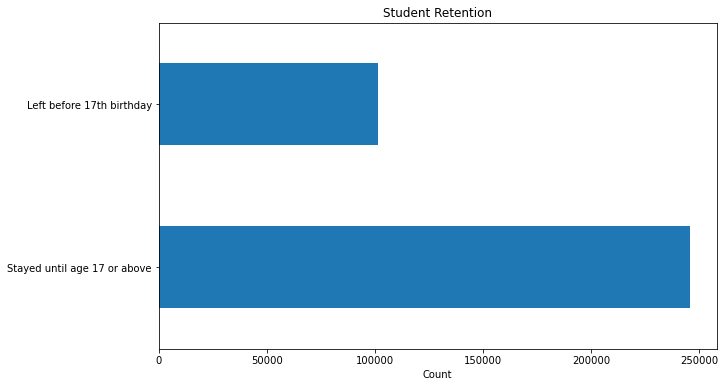

In [35]:
# calculate value counts
retention_counts = ncea['Student: Age (Retention to 17)'].value_counts()

fig = plt.figure(figsize=(10, 6))

# plot the bar chart
retention_counts.plot(kind='barh')

# add title and labels
plt.title('Student Retention')
plt.xlabel('Count')
plt.savefig('datacounts')
# show plot
plt.show()

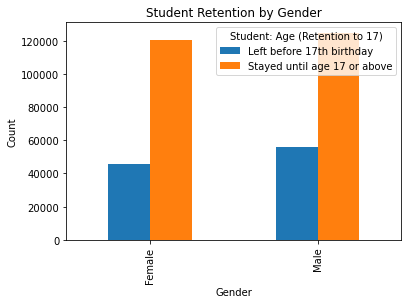

In [36]:
# calculate value counts
gender_counts = ncea.groupby(['Student: Student Gender', 'Student: Age (Retention to 17)']).size().unstack()

# plot the bar chart
gender_counts.plot(kind='bar')

# add title and labels
plt.title('Student Retention by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# show plot
plt.show()

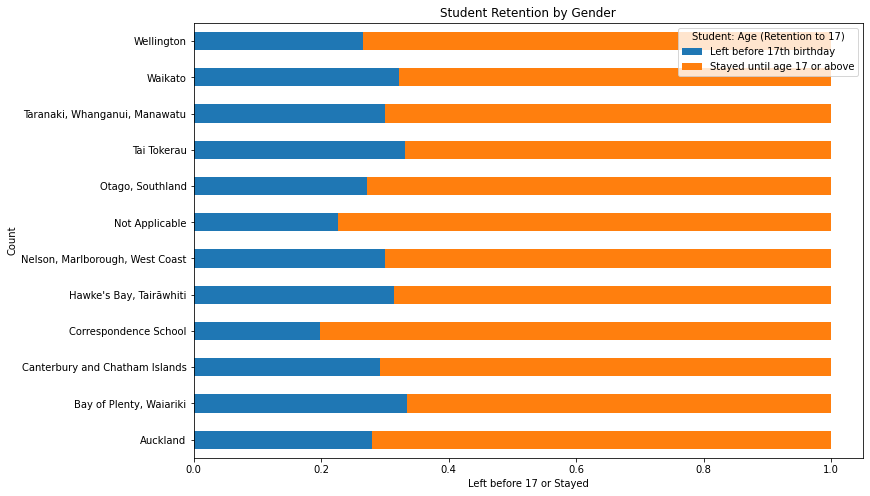

In [37]:
# calculate value counts
gender_counts = ncea.groupby(['Region: Education Area', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['Region: Education Area']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(12,8))

# add title and labels
plt.title('Student Retention by Gender')
plt.xlabel('Left before 17 or Stayed')
plt.ylabel('Count')

# show plot
plt.show()

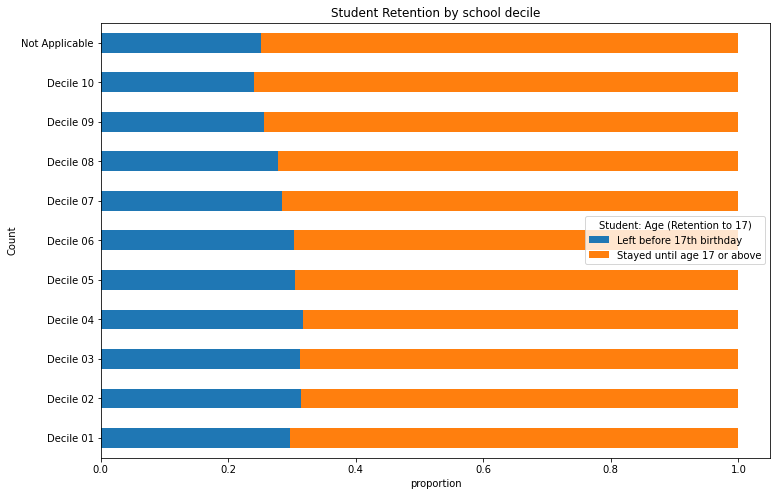

In [38]:
# calculate value counts
gender_counts = ncea.groupby(['School: Decile', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['School: Decile']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(12,8))

# add title and labels
plt.title('Student Retention by school decile')
plt.xlabel('proportion')
plt.ylabel('Count')

plt.savefig('decile_retention')

# show plot
plt.show()


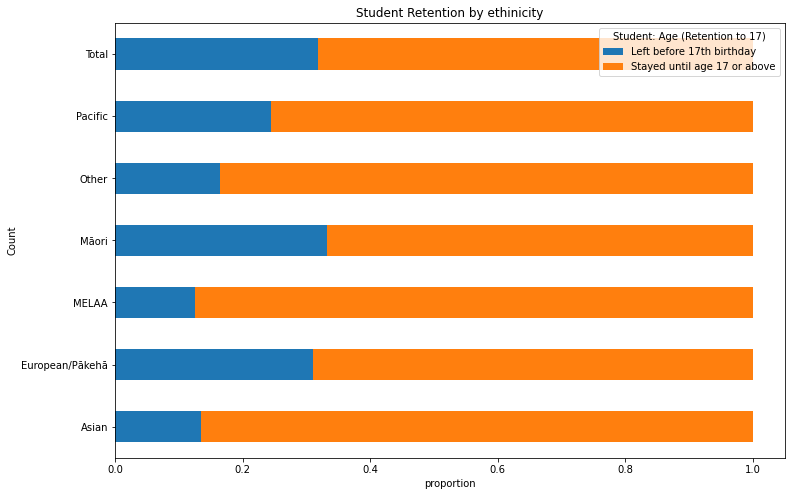

In [39]:
# calculate value counts
gender_counts = ncea.groupby(['Student: Ethnic Group', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['Student: Ethnic Group']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(12,8))

# add title and labels
plt.title('Student Retention by ethinicity')
plt.xlabel('proportion')
plt.ylabel('Count')

plt.savefig('ethinicity_retention')

# show plot
plt.show()


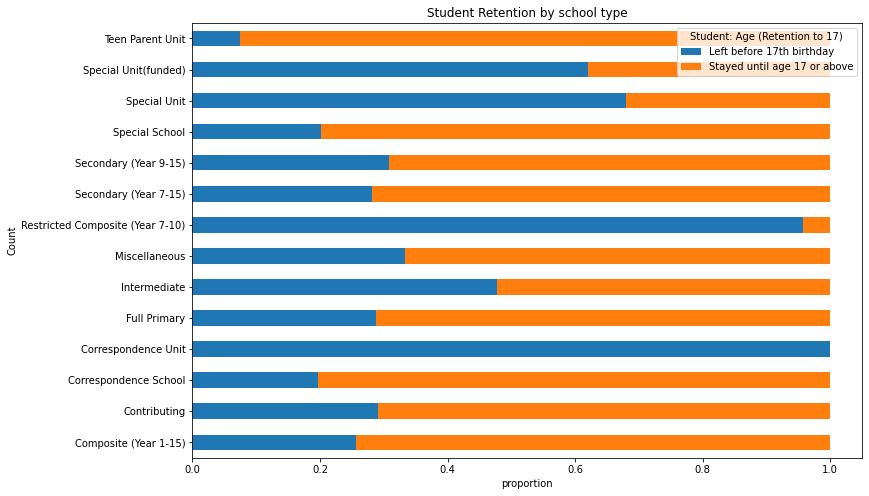

In [40]:
# calculate value counts
gender_counts = ncea.groupby(['School: School Type', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['School: School Type']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(12,8))

# add title and labels
plt.title('Student Retention by school type')
plt.xlabel('proportion')
plt.ylabel('Count')

plt.savefig('schooltype_retention')

# show plot
plt.show()


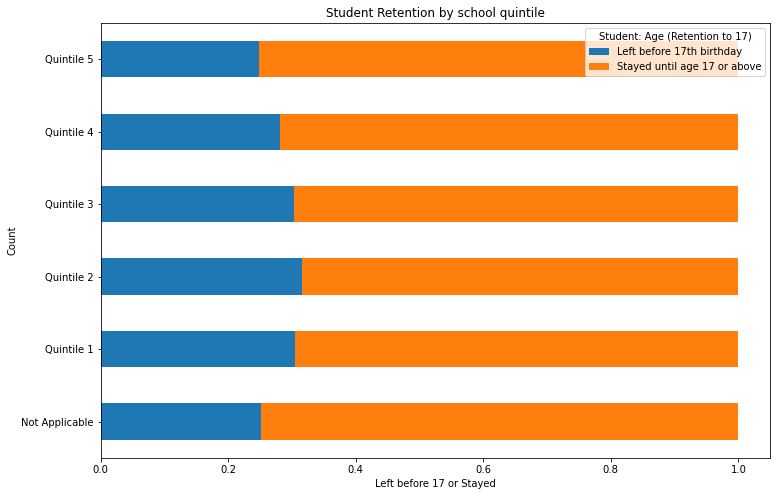

In [41]:
# calculate value counts
gender_counts = ncea.groupby(['School: Quintile', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['School: Quintile']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(12,8))

# add title and labels
plt.title('Student Retention by school quintile')
plt.xlabel('Left before 17 or Stayed')
plt.ylabel('Count')

# show plot
plt.show()

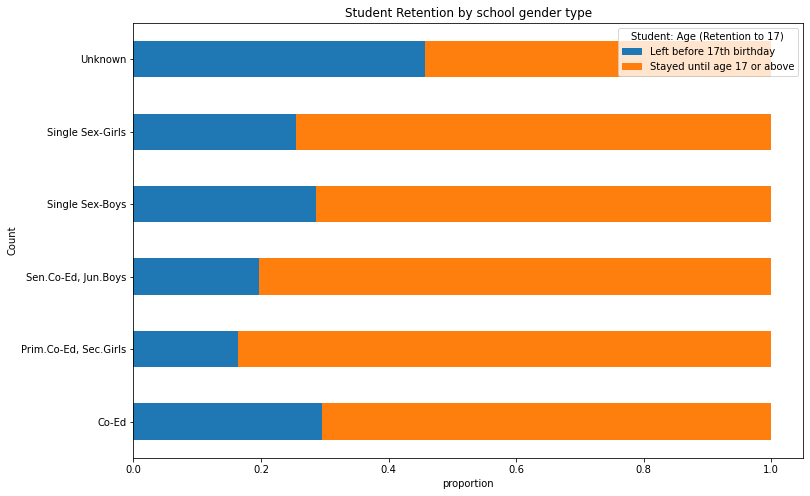

In [42]:
gender_counts = ncea.groupby(['School: School Gender', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['School: School Gender']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(12,8))

# add title and labels
plt.title('Student Retention by school gender type')
plt.xlabel('proportion')
plt.ylabel('Count')

plt.savefig('schoolgender_retention')
# show plot
plt.show()


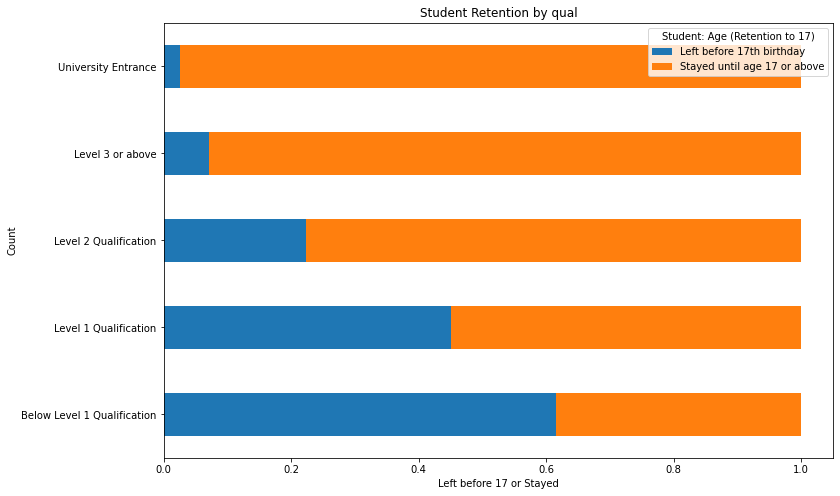

In [43]:
gender_counts = ncea.groupby(['Qualification: Highest Attainment (5 groups)', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['Qualification: Highest Attainment (5 groups)']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(12,8))

# add title and labels
plt.title('Student Retention by qual')
plt.xlabel('Left before 17 or Stayed')
plt.ylabel('Count')

plt.savefig('retention_highestqual')
# show plot
plt.show()

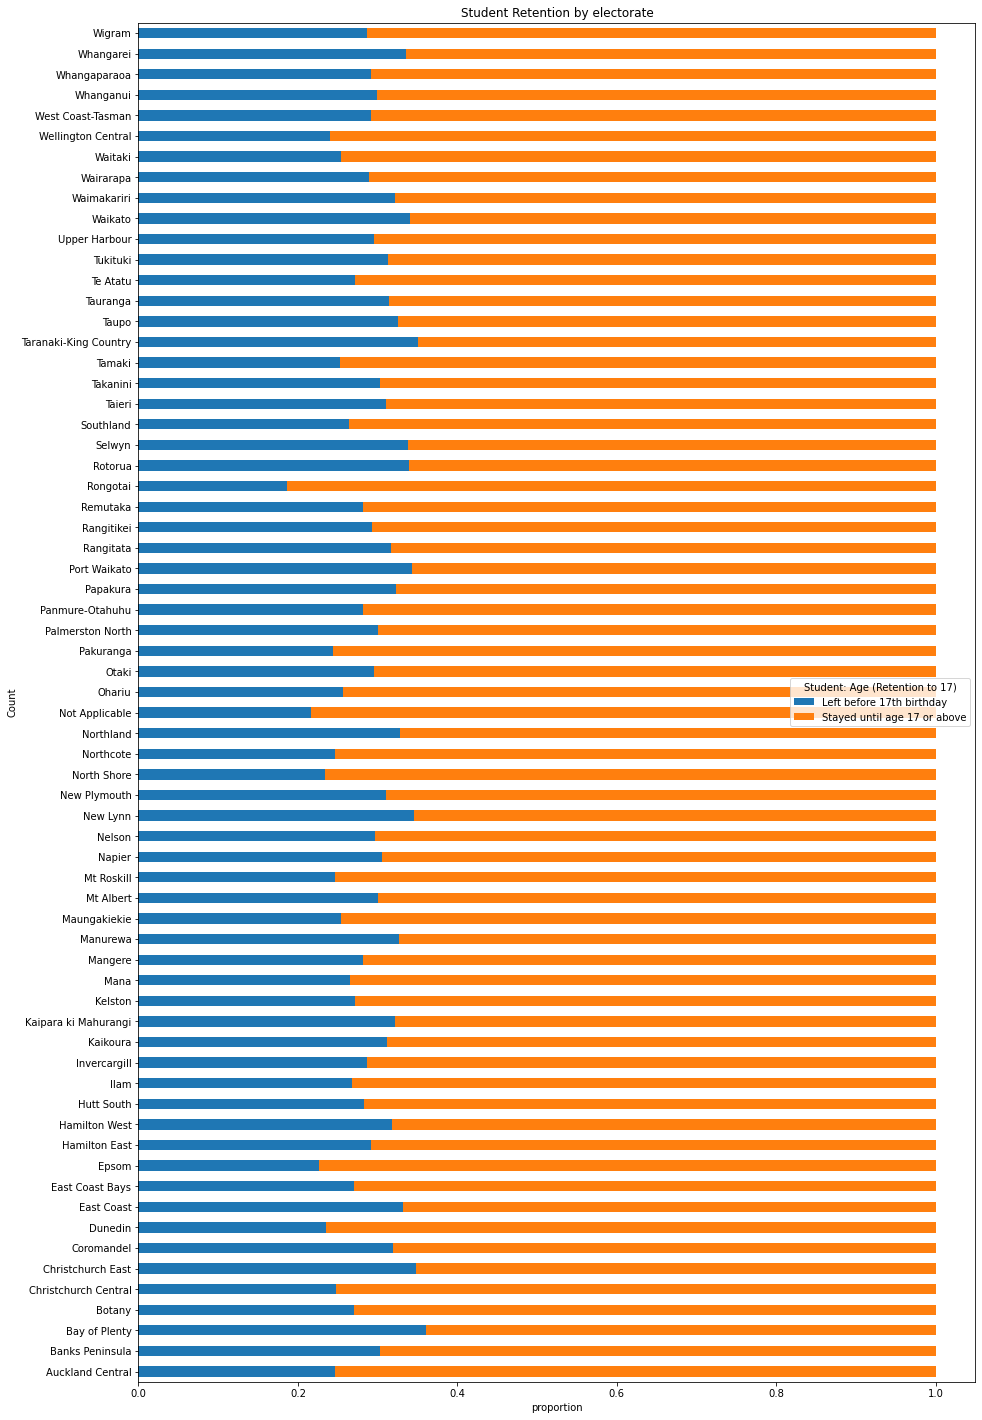

In [44]:
# calculate value counts
gender_counts = ncea.groupby(['Region: General Electorate' , 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['Region: General Electorate']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(15,25))



# add title and labels
plt.title('Student Retention by electorate')
plt.xlabel('proportion')
plt.ylabel('Count')

plt.savefig('electorate_retention')
# show plot
plt.show()


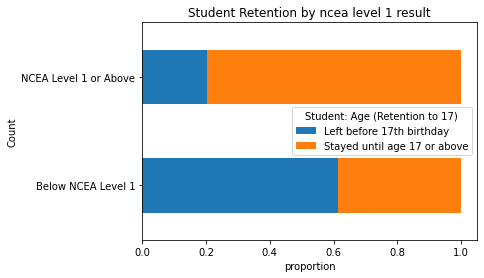

In [45]:
# calculate value counts
gender_counts = ncea.groupby(['Qualification: Level 1 or Above' , 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['Qualification: Level 1 or Above']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True)



# add title and labels
plt.title('Student Retention by ncea level 1 result')
plt.xlabel('proportion')
plt.ylabel('Count')

plt.savefig('nceal1_retention')
# show plot
plt.show()

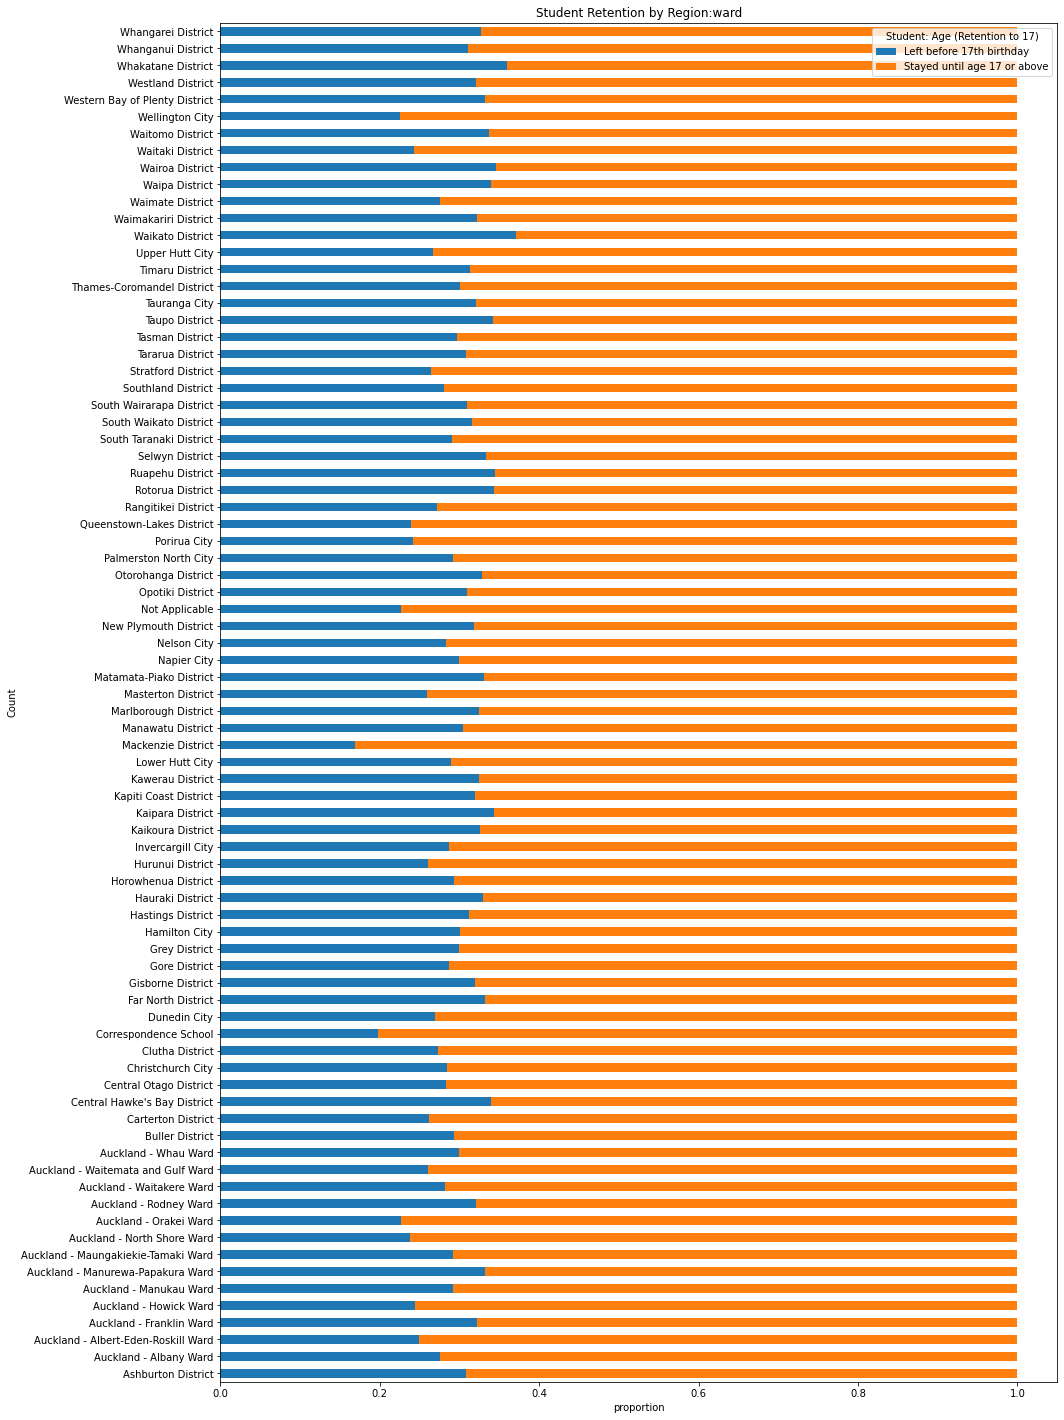

In [46]:

# calculate value counts
gender_counts = ncea.groupby(['Region: TA Ward', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['Region: TA Ward']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(15,25))

# add title and labels
plt.title('Student Retention by Region:ward')
plt.xlabel('proportion')
plt.ylabel('Count')

plt.savefig('region_ward_retention')
# show plot
plt.show()


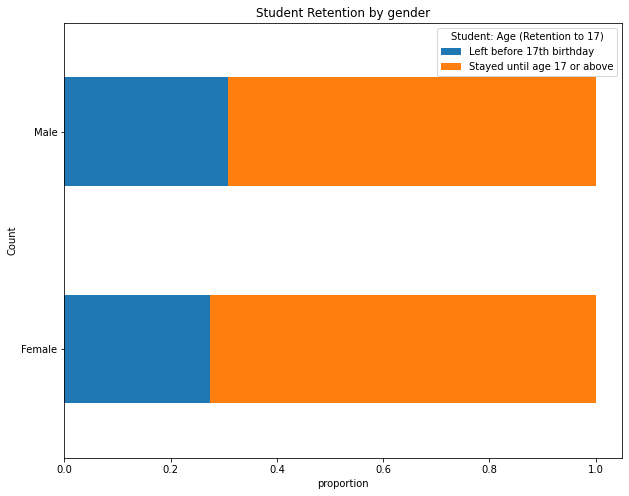

<Figure size 432x288 with 0 Axes>

In [47]:
# calculate value counts
gender_counts = ncea.groupby(['Student: Student Gender', 'Student: Age (Retention to 17)']).size().div(ncea.groupby(['Student: Student Gender']).size(), level=0).unstack()

# plot the bar chart
gender_counts.plot(kind='barh', stacked = True, figsize=(10,8))

# add title and labels
plt.title('Student Retention by gender')
plt.xlabel('proportion')
plt.ylabel('Count')

# show plot
plt.show()
plt.savefig('gender_retention')

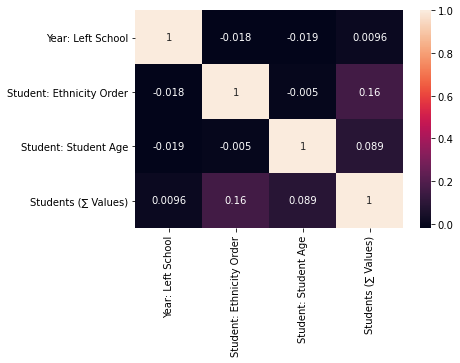

In [48]:
# Calculate the correlation matrix
corr = ncea.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

In [49]:
#map decile to integers
def map_decile(df):
    df['School: Decile'] = df['School: Decile'].map({"Not Applicable":0,"Decile 01": 1, "Decile 02": 2, "Decile 03": 3, "Decile 04": 4, "Decile 05": 5, "Decile 06": 6, "Decile 07": 7, "Decile 08": 8, "Decile 09":9, "Decile 10":10})
    return df

In [50]:
ncea = map_decile(ncea)

In [51]:

ncea['Student: Age (Retention to 17)'] = ncea['Student: Age (Retention to 17)'].map({'Left before 17th birthday': 1, 'Stayed until age 17 or above': 0})

In [52]:
ncea.head()

,Year: Left School,Student: Ethnicity Order,Student: Ethnic Group,Student: Student Gender,Student: Leaving Year Level,Student: Student Age,Student: Age (Retention to 17),Qualification: Highest Attainment (5 groups),Qualification: Level 1 or Above,Qualification: Level 2 or Above,Qualification: Level 3 or UE Award,School: School Type,School: School Sector,School: Authority,School: Definition,School: Affiliation,School: School Gender,Region: General Electorate,Region: Māori Electorate,Region: TA Ward,Region: TA Board,Region: Education Area,Region: Regional Council,School: Decile,School: Quintile,Region: Territorial Authority,Students (∑ Values)
0,2011,1,Māori,Female,Other/Unknown,15,1,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 7-15),Secondary,State,Not Applicable,NaN,Co-Ed,Whangarei,Te Tai Tokerau,Whangarei District,Whangarei District,Tai Tokerau,Northland Region,4,Quintile 2,Whangarei District,1
1,2011,1,Māori,Female,Other/Unknown,15,1,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,North Shore,Te Tai Tokerau,Auckland - North Shore Ward,Auckland - Devonport-Takapuna,Auckland,Auckland Region,10,Quintile 5,Auckland Local Board,1
2,2011,1,Māori,Female,Other/Unknown,16,1,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,East Coast,Ikaroa-Rāwhiti,Gisborne District,Gisborne District,"Hawke's Bay, Tairāwhiti",Gisborne Region,2,Quintile 1,Gisborne District,1
3,2011,1,Māori,Female,Other/Unknown,16,1,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,Te Atatu,Te Tai Tokerau,Auckland - Waitakere Ward,Auckland - Henderson-Massey,Auckland,Auckland Region,3,Quintile 2,Auckland Local Board,1
4,2011,1,Māori,Female,Other/Unknown,16,1,Level 1 Qualification,NCEA Level 1 or Above,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 9-15),Secondary,State,Not Applicable,NaN,Co-Ed,Mt Roskill,Tāmaki Makaurau,Auckland - Albert-Eden-Roskill Ward,Auckland - Puketapapa,Auckland,Auckland Region,7,Quintile 4,Auckland Local Board,1


# 4. Creating a new feature

In [53]:
# First, group the dataframe by 'Qualification', 'Gender', and 'Ethnicity' columns
grouped = ncea.groupby(['Student: Student Gender', 'Student: Ethnicity Order','School: School Type','Qualification: Level 3 or UE Award'])

# Calculate the value counts for each group
group_counts = grouped['Qualification: Level 3 or UE Award'].count()

# Reset the index to make the groups columns
group_counts = group_counts.reset_index(name='Counts')

# Calculate the proportions of each group
group_counts['Proportions'] = group_counts.groupby(['Student: Student Gender', 'Student: Ethnicity Order','School: School Type'])['Counts'].apply(lambda x: x/x.sum())

group_counts = group_counts[group_counts['Qualification: Level 3 or UE Award'] == 'UE award or Level 3']

# Merge the proportions back to the original dataframe
ncea = ncea.merge(group_counts, on=['Student: Student Gender', 'Student: Ethnicity Order','School: School Type'])

In [54]:
ncea

,Year: Left School,Student: Ethnicity Order,Student: Ethnic Group,Student: Student Gender,Student: Leaving Year Level,Student: Student Age,Student: Age (Retention to 17),Qualification: Highest Attainment (5 groups),Qualification: Level 1 or Above,Qualification: Level 2 or Above,Qualification: Level 3 or UE Award_x,School: School Type,School: School Sector,School: Authority,School: Definition,School: Affiliation,School: School Gender,Region: General Electorate,Region: Māori Electorate,Region: TA Ward,Region: TA Board,Region: Education Area,Region: Regional Council,School: Decile,School: Quintile,Region: Territorial Authority,Students (∑ Values),Qualification: Level 3 or UE Award_y,Counts,Proportions
0,2011,1,Māori,Female,Other/Unknown,15,1,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 7-15),Secondary,State,Not Applicable,NaN,Co-Ed,Whangarei,Te Tai Tokerau,Whangarei District,Whangarei District,Tai Tokerau,Northland Region,4,Quintile 2,Whangarei District,1,UE award or Level 3,2044,0.382270
1,2011,1,Māori,Female,Other/Unknown,17,0,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 7-15),Secondary,State,Not Applicable,NaN,Co-Ed,Napier,Ikaroa-Rāwhiti,Napier City,Napier City,"Hawke's Bay, Tairāwhiti",Hawkes Bay Region,2,Quintile 1,Napier City,1,UE award or Level 3,2044,0.382270
2,2011,1,Māori,Female,Other/Unknown,18,0,Below Level 1 Qualification,Below NCEA Level 1,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 7-15),Secondary,State,Not Applicable,NaN,Co-Ed,Napier,Ikaroa-Rāwhiti,Napier City,Napier City,"Hawke's Bay, Tairāwhiti",Hawkes Bay Region,2,Quintile 1,Napier City,1,UE award or Level 3,2044,0.382270
3,2011,1,Māori,Female,Other/Unknown,18,0,Level 1 Qualification,NCEA Level 1 or Above,Below NCEA Level 2,Below Level 3 (Without UE),Secondary (Year 7-15),Secondary,State,Not Applicable,NaN,Co-Ed,Tukituki,Ikaroa-Rāwhiti,Hastings District,Hastings District,"Hawke's Bay, Tairāwhiti",Hawkes Bay Region,1,Quintile 1,Hastings District,1,UE award or Level 3,2044,0.382270
4,2011,1,Māori,Female,Other/Unknown,18,0,Level 2 Qualification,NCEA Level 1 or Above,NCEA Level 2 or Above,Below Level 3 (Without UE),Secondary (Year 7-15),Secondary,State,Not Applicable,NaN,Co-Ed,Botany,Tāmaki Makaurau,Auckland - Manukau Ward,Auckland - Otara-Papatoetoe,Auckland,Auckland Region,1,Quintile 1,Auckland Local Board,1,UE award or Level 3,2044,0.382270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346758,2019,3,Asian,Female,Other/Unknown,18,0,University Entrance,NCEA Level 1 or Above,NCEA Level 2 or Above,UE award or Level 3,Intermediate,Primary,State,Not Applicable,NaN,Co-Ed,Pakuranga,Tāmaki Makaurau,Auckland - Howick Ward,Auckland - Howick,Auckland,Auckland Region,9,Quintile 5,Auckland Local Board,1,UE award or Level 3,1,1.000000
346759,2020,4,MELAA,Female,Year 11,18,0,Level 1 Qualification,NCEA Level 1 or Above,Below NCEA Level 2,Below Level 3 (Without UE),Full Primary,Primary,Private : Fully Registered,Not Applicable,NaN,Co-Ed,East Coast Bays,Te Tai Tokerau,Auckland - Albany Ward,Auckland - Upper Harbour,Auckland,Auckland Region,9,Quintile 5,Auckland Local Board,1,UE award or Level 3,2,0.666667
346760,2020,4,MELAA,Female,Year 13,17,0,University Entrance,NCEA Level 1 or Above,NCEA Level 2 or Above,UE award or Level 3,Full Primary,Primary,Private : Fully Registered,Not Applicable,NaN,Co-Ed,East Coast Bays,Te Tai Tokerau,Auckland - Albany Ward,Auckland - Upper Harbour,Auckland,Auckland Region,9,Quintile 5,Auckland Local Board,1,UE award or Level 3,2,0.666667
346761,2020,4,MELAA,Female,Year 13,18,0,University Entrance,NCEA Level 1 or Above,NCEA Level 2 or Above,UE award or Level 3,Full Primary,Primary,Private : Fully Registered,Not Applicable,NaN,Co-Ed,East Coast Bays,Te Tai Tokerau,Auckland - Albany Ward,Auckland - Upper Harbour,Auckland,Auckland Region

In [55]:
# Specify the columns to keep
columns_to_keep = ['Student: Ethnicity Order', 'Student: Student Gender', 'School: School Type',
                   'School: School Gender', 'Qualification: Level 1 or Above','Region: General Electorate', 'School: Decile','Proportions','Student: Age (Retention to 17)']

# Drop all columns that are not in columns_to_keep
ncea_filtered = ncea[columns_to_keep]

In [56]:
#dropping the target column
X =ncea_filtered.drop('Student: Age (Retention to 17)', axis=1)

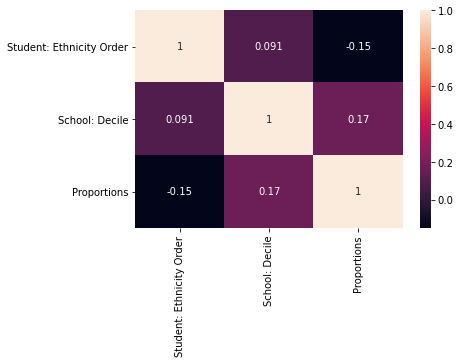

In [57]:
# Calculate the correlation matrix
corr =X.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

# 5. Saving required dfs into files

In [58]:
#Setting target
y=ncea['Student: Age (Retention to 17)']

In [59]:
#Name the columns with easier labels
X.columns = [['Ethnicity', 'Gender',
       'SchoolType', 'SchoolGender', 'Level1_qual','Region', 'Decile', 'Proportions']]

In [60]:
# Getting dummies for categorical columns
X_dummy = pd.get_dummies(X, columns=['Ethnicity', 'Gender',
       'SchoolType', 'SchoolGender', 'Level1_qual','Region'], drop_first=True)

C:\Users\ruskin.dantra\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [61]:
#Storing features dummified
X_dummy.to_csv('../Data/ncea_dummyData.csv',index=False)

In [62]:
#Storing target 
y.to_csv('../Data/ncea_targetData.csv',index=False)

In [63]:
#Storing features in original format
X.to_csv('../Data/ncea_filtered.csv',index=False)

In [64]:
#Original dataframe filtered out
ncea_filtered.to_csv('../Data/ncea_cleaned.csv',index=False)